In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\ivana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


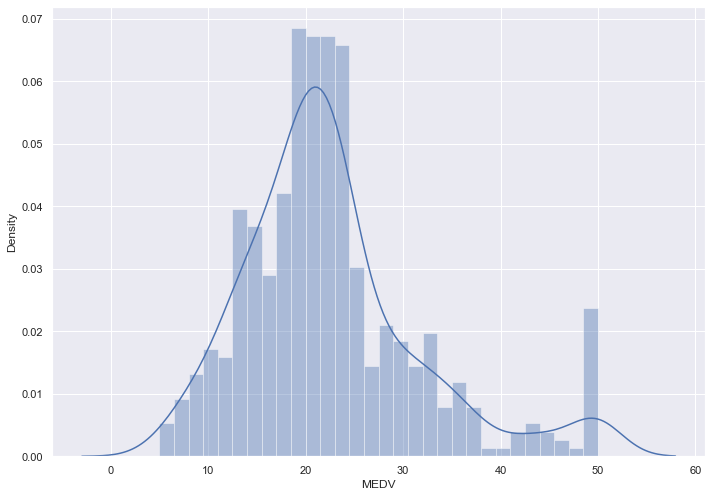

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()

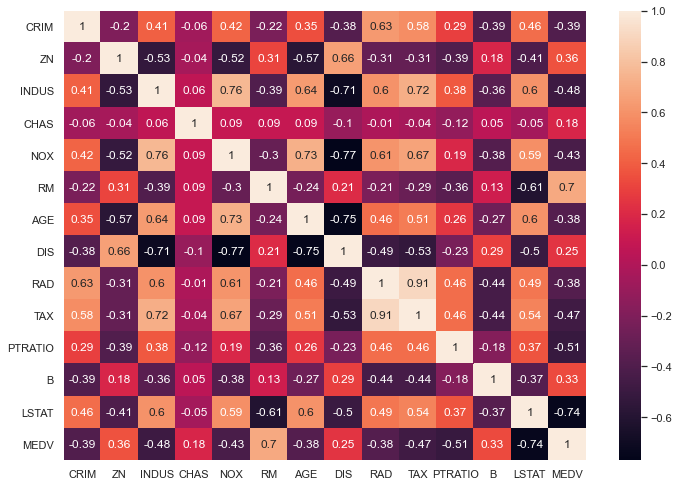

In [8]:
correlation_matrix = data.corr().round(2)

# annot = True для печати значений внутри квадрата

sns.heatmap(data=correlation_matrix, annot=True);

Выводы:
* Чтобы соответствовать модели линейной регрессии, мы выбираем те характеристики, которые имеют высокую корреляцию с нашей целевой переменной MEDV. Посмотрев на матрицу корреляции, мы можем увидеть, что RM имеет сильную положительную корреляцию с MEDV (0,7), тогда как LSTAT имеет высокую отрицательную корреляцию с MEDV (-0,74).  
* Важным моментом при выборе функций для модели линейной регрессии является проверка мультиколинейности. Характеристики RAD, TAX имеют соотношение 0,91. Эти пары функций сильно коррелированы друг с другом. Мы не должны выбирать обе эти функции вместе для обучения модели. Проверьте это для объяснения. То же самое касается функций DIS и AGE, у которых соотношение составляет -0,75.

Основываясь на приведенных выше наблюдениях, мы будем использовать RM и LSTAT в качестве наших функций. Используя диаграмму рассеяния, давайте посмотрим, как эти функции меняются в зависимости от MEDV.

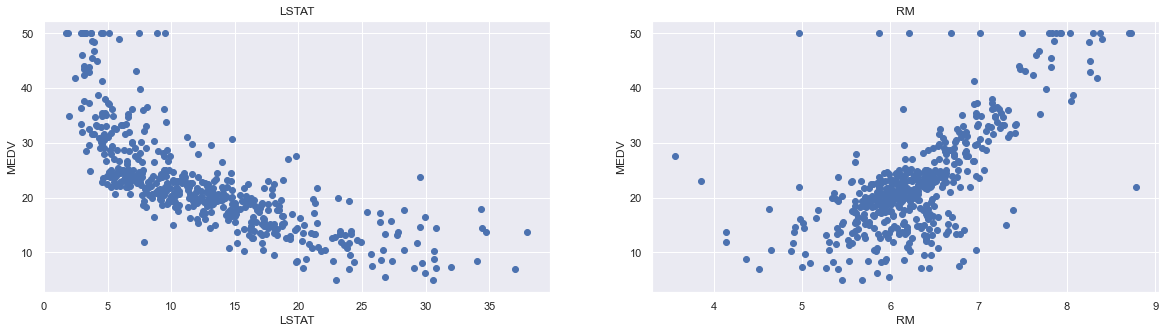

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [10]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [11]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [12]:
from sklearn import metrics, tree 

In [13]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [14]:
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
print("The model training score is" , tree_reg.score(X_train, Y_train))

The model training score is 1.0


Самая наивысшая оценка 1.0 указывает на переобучение модели.

Чтобы решить проблему переобучения из-за неограниченной глубины дерева во время обучения модели, мы поставим ограничение на максимальную глубину 4.

In [16]:
tree_reg = tree.DecisionTreeRegressor(max_depth = 6)
tree_reg.fit(X_train, Y_train)

print("The model training score is" , round(tree_reg.score(X_train, Y_train), 4))

The model training score is 0.8979


In [17]:
tree_reg = tree.DecisionTreeRegressor(max_depth = 7)
tree_reg.fit(X_train, Y_train)

print("The model training score is" , round(tree_reg.score(X_train, Y_train), 4))

The model training score is 0.94


In [18]:
list_depth = [1, 2, 3, 4, 5, 7]

for i in list_depth:
    tree_reg = tree.DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(X, y)
    print("The model training score is" , round(tree_reg.score(X, y), 4))

The model training score is 0.4527
The model training score is 0.6956
The model training score is 0.7833
The model training score is 0.8219
The model training score is 0.8554
The model training score is 0.9241


Это решает проблему переобучения модели на обучающих данных, и модель готова прогнозировать цену на жильё.

In [19]:
y_pred_tree = tree_reg.predict(x_test)

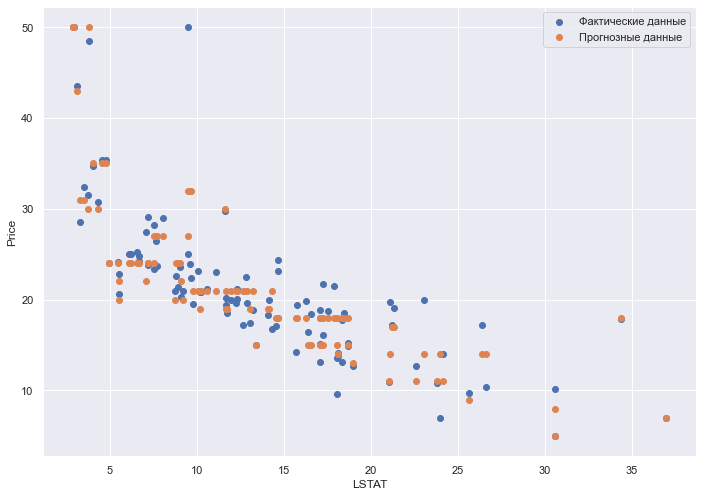

In [20]:
plt.scatter(x_test['LSTAT'], y_test, label = "Фактические данные", marker = 'o') 
plt.scatter(x_test['LSTAT'], np.rint(y_pred_tree), label = "Прогнозные данные", marker = 'o') 
plt.ylabel('Price')
plt.xlabel('LSTAT') 
plt.legend(loc = 'best') 
plt.show()

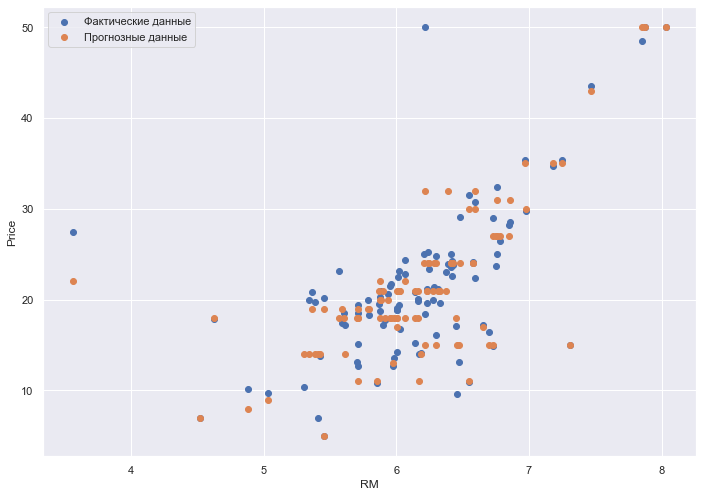

In [21]:
plt.scatter(x_test['RM'], y_test, label = "Фактические данные", marker = 'o') 
plt.scatter(x_test['RM'], np.rint(y_pred_tree), label = "Прогнозные данные", marker = 'o') 
plt.ylabel('Price')
plt.xlabel('RM') 
plt.legend(loc = 'best') 
plt.show()

In [22]:
# Fit regression model

list_depth = [1,2,3,4,5,7]
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = tree.DecisionTreeRegressor(max_depth=i).fit(X, y)
dt_regs['depth=inf'] = tree.DecisionTreeRegressor().fit(X, y)
dt_regs['reg'] = tree.DecisionTreeRegressor(min_samples_leaf=3, criterion='mae').fit(X, y)

In [23]:
# Predict

pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(x_test)

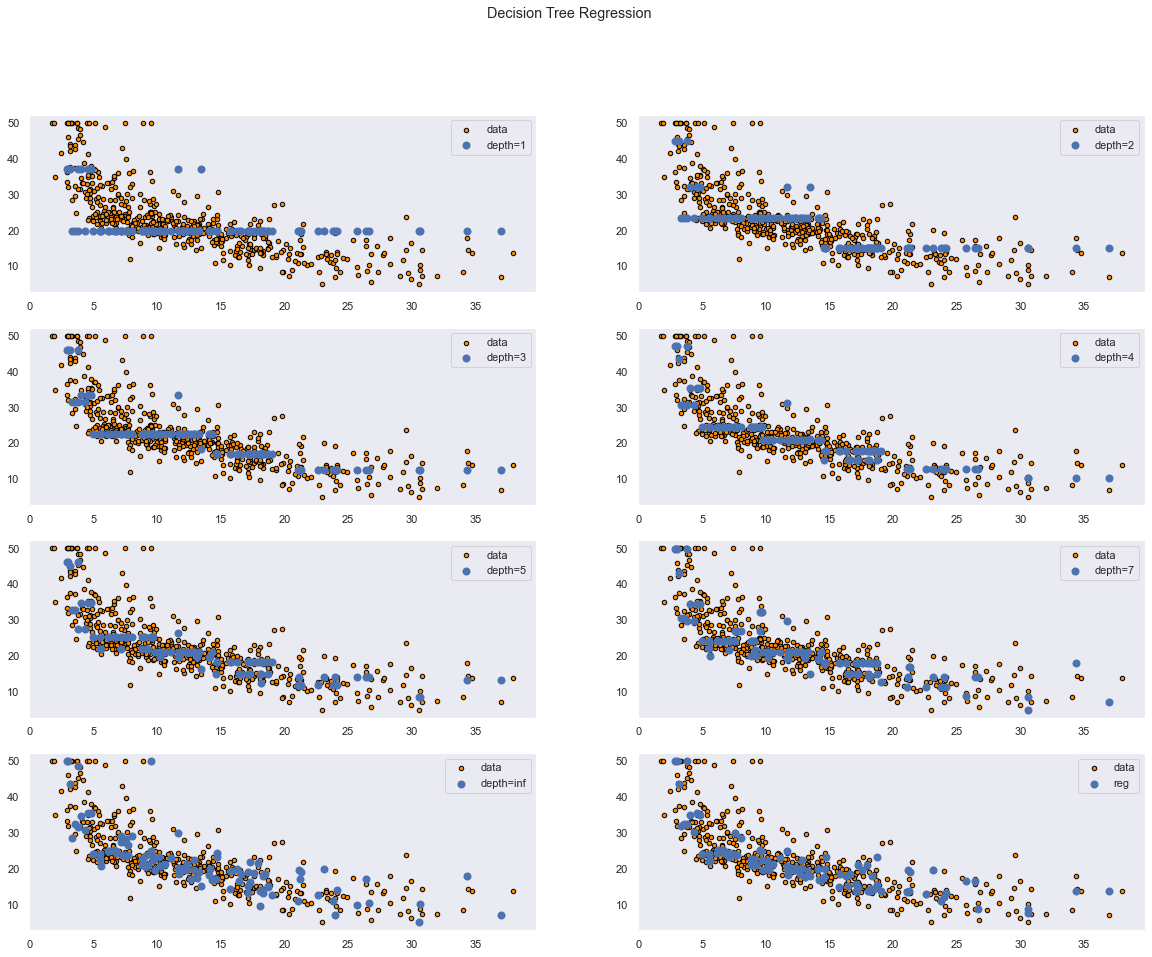

In [24]:
# Plot the results

fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X['LSTAT'], y, s=20, edgecolor="black",c="darkorange", label="data")
    ax.scatter(x_test['LSTAT'], cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()

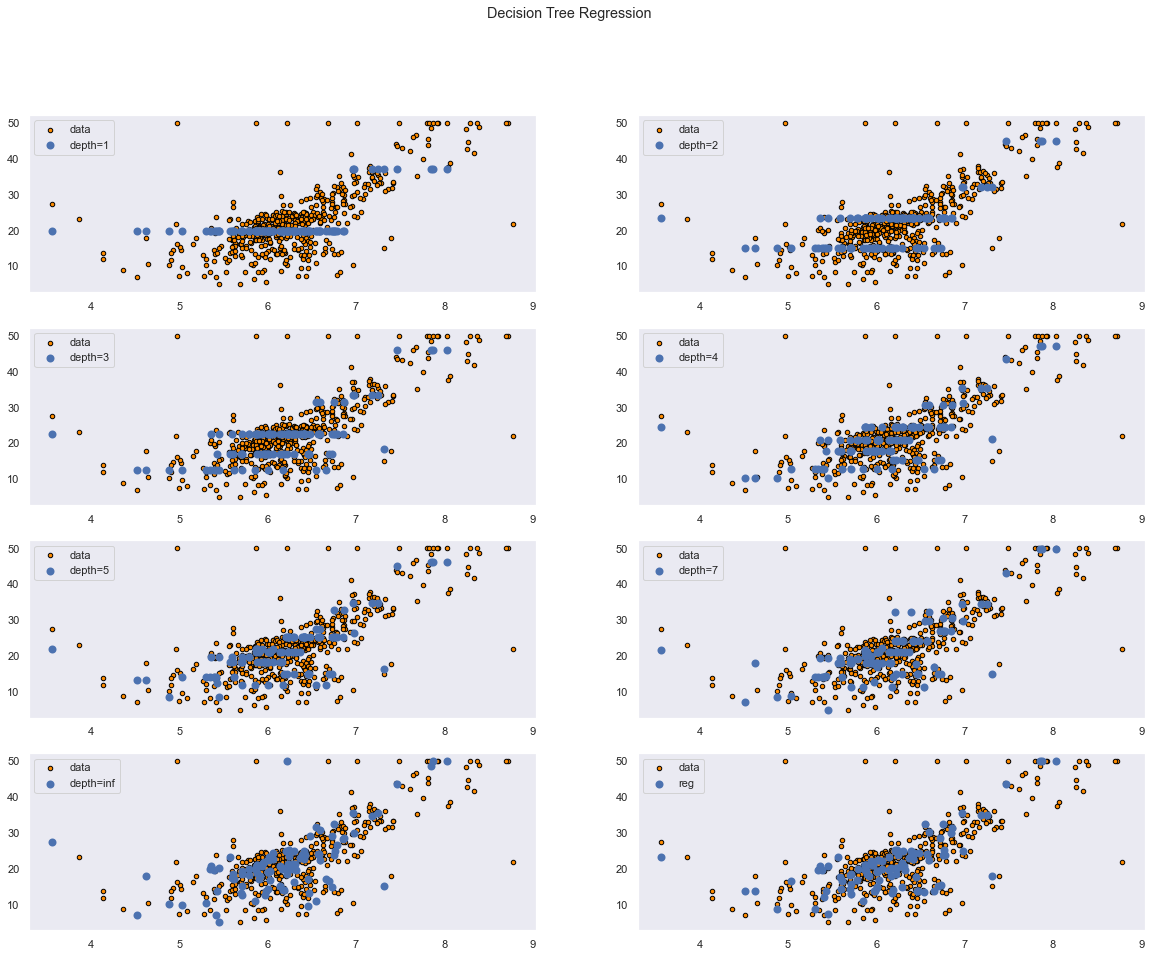

In [29]:
# Plot the results

fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X['RM'], y, s=20, edgecolor="black",c="darkorange", label="data")
    ax.scatter(x_test['RM'], cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()

[Text(375.68595535714286, 421.4598749999999, 'X[1] <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(189.44598214285713, 365.26522499999993, 'X[0] <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(78.11003571428571, 309.07057499999996, 'X[0] <= 4.91\nmse = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(25.648071428571427, 252.87592499999994, 'X[1] <= 5.63\nmse = 47.187\nsamples = 20\nvalue = 31.565'),
 Text(20.984785714285714, 196.68127499999997, 'mse = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(30.311357142857144, 196.68127499999997, 'X[1] <= 6.659\nmse = 30.843\nsamples = 19\nvalue = 30.595'),
 Text(18.653142857142857, 140.48662499999995, 'X[1] <= 6.495\nmse = 10.034\nsamples = 8\nvalue = 27.525'),
 Text(9.326571428571429, 84.29197499999998, 'X[1] <= 6.364\nmse = 0.423\nsamples = 2\nvalue = 24.15'),
 Text(4.663285714285714, 28.097325000000012, 'mse = 0.0\nsamples = 1\nvalue = 23.5'),
 Text(13.989857142857144, 28.097325000000012, 'mse = 0.0\nsamples = 1\nvalue = 24

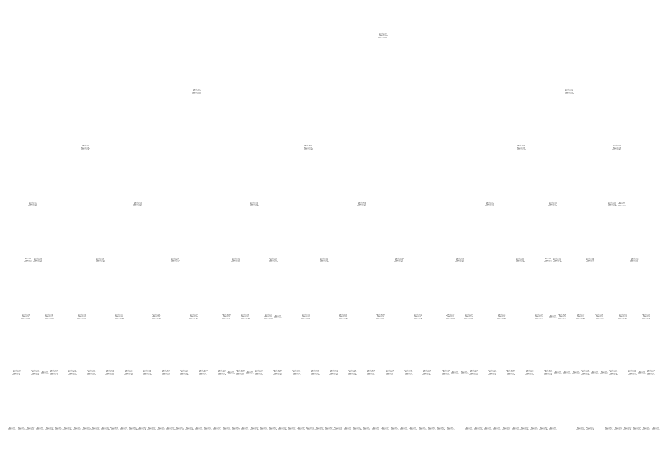

In [25]:
tree.plot_tree(tree_reg)